In [65]:
import pandas as pd

In [66]:
def read_and_rename_excel(month, year):
    path = f"../data/climat/weather-xlsx/reykjavik-{month}-{year}.xlsx"

    df = pd.read_excel(path)
    df = df.rename(
        columns={
            "dagur": "day",
            "meðalhiti (°C)": "average_temperature",
            "hámark (°C)": "max_temperature",
            "lágmark (°C)": "min_temperature",
            "úrkoma (mm)": "rainfall",
            "úrkomutegund": "rain_type",
            "snjódýpt": "snow_depth",
            "snjóhula (0−4)": "snow_type",
            "sólskin (klst)": "sunshine_hours",
            "meðalvindur (m/s)": "average_wind_speed",
            "mesti vindur (m/s)": "max_wind_speed",
            "hviða (m/s)": "gusts",
        }
    )

    day = df["day"]
    day = day.apply(lambda x: f"0{x}" if x < 10 else x)
    
    if month < 10:
        month = f"0{month}"

    df["date"] = day.apply(lambda x: f"{year}-{month}-{x}")
    df = df.drop(columns=["day"])

    return df

In [67]:
previous_df = None
for year in range(2019, 2022):
    for month in range(1, 13):
        error_at_paths = []

        try:
            current_df = read_and_rename_excel(month, year)
            if previous_df is None:
                previous_df = current_df
            else:
                previous_df = pd.concat([previous_df, current_df])


        except Exception as e:
            path = f"../data/climat/weather-xlsx/reykjavik-{month}-{year}.xlsx"
            error_at_paths.append(path)
            print(e)

if len(error_at_paths) > 0:
    print(error_at_paths) 

previous_df.to_csv("../data/climat/weather.csv", index=False)

# note that the data is not complete, some months are missing

In [68]:
df = pd.read_csv("../data/climat/weather.csv")

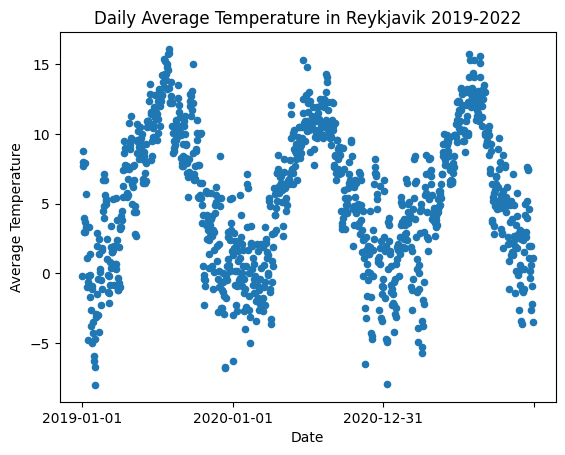

In [69]:
from matplotlib import pyplot as plt
from matplotlib.dates import YearLocator

plt.scatter(df["date"], df["average_temperature"], s=20)
plt.title("Daily Average Temperature in Reykjavik 2019-2022")
plt.xlabel("Date")  # e.g. 01-01-2019
plt.ylabel("Average Temperature")

# Set the x-axis ticks to display only yearly ticks
plt.gca().xaxis.set_major_locator(YearLocator())

plt.xticks()
plt.show()
